Training the same model using pytorch inbuilt functions

In [48]:
# Code by Bhavy Kharbanda
# Sap Id: 500082531

In [49]:
# Importing the libraries
import torch
import sklearn
import torch.nn as nn
import torch.nn.functional as F

In [50]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# make_classification to generate a random classification dataset
# train_test split to split the data in training and testing
# StandardScaler to Standardize features by removing the mean and scaling to unit variance.


In [51]:
# Creating The dataset
X,y=make_classification(n_samples=1000,n_classes=2,n_features=4)

# Normalizing the Dataset
scaler=StandardScaler()
X=scaler.fit_transform(X)

# Converting Array to Tensor objects
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=21)
print(X_train.shape)
print(X_test.shape)
# Direct function in sklearn to split the dataset

torch.Size([700, 4])
torch.Size([300, 4])


In [53]:
class NNpt(nn.Module):
  def __init__(self,n_features):
    super(NNpt,self).__init__()
    self.linear=nn.Linear(n_features,1)

    self.linear.weight.detach().zero_()
    self.linear.bias.detach().zero_()


  def forward(self,x):
    out=self.linear(x)
    return out.view(-1)

def loss_fn(yhat,y):
  return torch.mean((yhat-y)**2)

In [54]:
def train(model,x,y,n_epoch=10,lr=0.001,seed=23,bsz=50):

  cost=[]
  torch.manual_seed(seed)
   # To optimize our algorithm
  optimizer=torch.optim.SGD(model.parameters(),lr=lr)
  for i in range(n_epoch):
    suffle_idx=torch.randperm(y.size(0))
    batches=torch.split(suffle_idx,bsz)

    for idx in batches:
      # 1. Compute the Output
      yhat=model.forward(x[idx])

      # 2. Compute the Loss
      loss=torch.nn.functional.mse_loss(yhat,y[idx])

      # 3. Compute the Gradients
      optimizer.zero_grad()
      loss.backward()

      # 4. Update the Model Parameters
      optimizer.step()

      #model.weight=model.weight-lr*grad_w
      #model.bias=model.bias-lr*grad_b

    # 5. Log and print the Loss
    with torch.no_grad():
      yhat=model.forward(x)
      curr_loss=loss_fn(yhat,y)
      print('Epoc: %3d ' % (i+1),end="")
      print('| MSE % .5f' % curr_loss)
      cost.append(curr_loss)
      
  return cost

In [55]:
n_feature=X_train.size(1)
model=NNpt(n_features=n_feature)
# Calling the model
cost=train(model,X_train,y_train,n_epoch=50)

Epoc:   1 | MSE  0.45627
Epoc:   2 | MSE  0.42968
Epoc:   3 | MSE  0.40563
Epoc:   4 | MSE  0.38386
Epoc:   5 | MSE  0.36406
Epoc:   6 | MSE  0.34603
Epoc:   7 | MSE  0.32962
Epoc:   8 | MSE  0.31459
Epoc:   9 | MSE  0.30083
Epoc:  10 | MSE  0.28822
Epoc:  11 | MSE  0.27661
Epoc:  12 | MSE  0.26592
Epoc:  13 | MSE  0.25608
Epoc:  14 | MSE  0.24697
Epoc:  15 | MSE  0.23854
Epoc:  16 | MSE  0.23074
Epoc:  17 | MSE  0.22349
Epoc:  18 | MSE  0.21677
Epoc:  19 | MSE  0.21050
Epoc:  20 | MSE  0.20465
Epoc:  21 | MSE  0.19920
Epoc:  22 | MSE  0.19410
Epoc:  23 | MSE  0.18934
Epoc:  24 | MSE  0.18489
Epoc:  25 | MSE  0.18072
Epoc:  26 | MSE  0.17682
Epoc:  27 | MSE  0.17316
Epoc:  28 | MSE  0.16971
Epoc:  29 | MSE  0.16649
Epoc:  30 | MSE  0.16345
Epoc:  31 | MSE  0.16060
Epoc:  32 | MSE  0.15792
Epoc:  33 | MSE  0.15539
Epoc:  34 | MSE  0.15302
Epoc:  35 | MSE  0.15078
Epoc:  36 | MSE  0.14868
Epoc:  37 | MSE  0.14669
Epoc:  38 | MSE  0.14482
Epoc:  39 | MSE  0.14305
Epoc:  40 | MSE  0.14139


[]

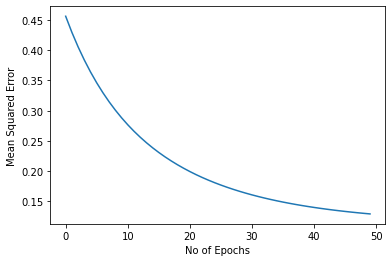

In [56]:
import matplotlib.pyplot as plt
plt.plot(range(len(cost)),cost)
plt.xlabel('No of Epochs')
plt.ylabel('Mean Squared Error')
plt.plot()

In [57]:
ones=torch.ones(y_train.size(0))
zero=torch.zeros(y_train.size(0))
train_pred=model.forward(X_train)

train_acc=torch.mean((torch.where( train_pred >0.5 , ones,zero).int()==y_train).float())
#print(train_acc)

ones=torch.ones(y_test.size(0))
zero=torch.zeros(y_test.size(0))
test_pred=model.forward(X_test)

test_acc=torch.mean((torch.where( test_pred >0.5 , ones,zero).int()==y_test).float())
print('Training Accuracy: %.2f' % (train_acc*100),'%')
print('Testing Accuracy: %.2f' % (test_acc*100),'%')

Training Accuracy: 86.57 %
Testing Accuracy: 88.67 %


Logistic Regression on the same model, 
Just changing the way how we calculate the loss.

In [58]:
def train(model,x,y,n_epoch=10,lr=0.001,seed=23,bsz=50):

  cost=[]
  torch.manual_seed(seed)
   ### Optimizer
  optimizer=torch.optim.SGD(model.parameters(),lr=lr)
  for i in range(n_epoch):
    suffle_idx=torch.randperm(y.size(0))
    batches=torch.split(suffle_idx,bsz)

    for idx in batches:
      # 1. Compute the Output
      yhat=model.forward(x[idx])

      # 2. Compute the Loss
      loss=torch.nn.functional.binary_cross_entropy(torch.sigmoid(yhat),y[idx])
      # Function that measures the Binary Cross Entropy between the target and input probabilities

      # 3. Compute the Gradients
      optimizer.zero_grad()
      loss.backward()

      # 4. Update the Model Parameters
      optimizer.step()

      #model.weight=model.weight-lr*grad_w
      #model.bias=model.bias-lr*grad_b

    # 5. Log and print the Loss
    with torch.no_grad():
      yhat=model.forward(x)
      curr_loss=loss_fn(yhat,y)
      print('Epoc: %3d ' % (i+1),end="")
      print('| MSE % .5f' % curr_loss)
      cost.append(curr_loss)
      
  return cost

In [59]:
n_feature=X_train.size(1)
model=NNpt(n_features=n_feature)

In [60]:
cost=train(model,X_train,y_train,n_epoch=50)

Epoc:   1 | MSE  0.47681
Epoc:   2 | MSE  0.46834
Epoc:   3 | MSE  0.46028
Epoc:   4 | MSE  0.45263
Epoc:   5 | MSE  0.44538
Epoc:   6 | MSE  0.43852
Epoc:   7 | MSE  0.43204
Epoc:   8 | MSE  0.42592
Epoc:   9 | MSE  0.42017
Epoc:  10 | MSE  0.41476
Epoc:  11 | MSE  0.40970
Epoc:  12 | MSE  0.40498
Epoc:  13 | MSE  0.40058
Epoc:  14 | MSE  0.39650
Epoc:  15 | MSE  0.39273
Epoc:  16 | MSE  0.38926
Epoc:  17 | MSE  0.38608
Epoc:  18 | MSE  0.38320
Epoc:  19 | MSE  0.38059
Epoc:  20 | MSE  0.37825
Epoc:  21 | MSE  0.37619
Epoc:  22 | MSE  0.37438
Epoc:  23 | MSE  0.37282
Epoc:  24 | MSE  0.37151
Epoc:  25 | MSE  0.37045
Epoc:  26 | MSE  0.36961
Epoc:  27 | MSE  0.36901
Epoc:  28 | MSE  0.36863
Epoc:  29 | MSE  0.36846
Epoc:  30 | MSE  0.36851
Epoc:  31 | MSE  0.36877
Epoc:  32 | MSE  0.36922
Epoc:  33 | MSE  0.36987
Epoc:  34 | MSE  0.37072
Epoc:  35 | MSE  0.37175
Epoc:  36 | MSE  0.37296
Epoc:  37 | MSE  0.37435
Epoc:  38 | MSE  0.37592
Epoc:  39 | MSE  0.37765
Epoc:  40 | MSE  0.37954


[]

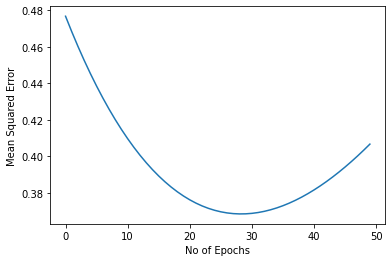

In [61]:
plt.plot(range(len(cost)),cost)
plt.xlabel('No of Epochs')
plt.ylabel('Mean Squared Error')
plt.plot()

In [62]:
ones=torch.ones(y_train.size(0))
zero=torch.zeros(y_train.size(0))
train_pred=model.forward(X_train)

train_acc=torch.mean((torch.where( train_pred >0.5 , ones,zero).int()==y_train).float())
#print(train_acc)

ones=torch.ones(y_test.size(0))
zero=torch.zeros(y_test.size(0))
test_pred=model.forward(X_test)

test_acc=torch.mean((torch.where( test_pred >0.5 , ones,zero).int()==y_test).float())
print('Training Accuracy: %.2f' % (train_acc*100),'%')
print('Testing Accuracy: %.2f' % (test_acc*100),'%')

Training Accuracy: 64.57 %
Testing Accuracy: 63.67 %
